In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid_spec
from matplotlib.ticker import FuncFormatter

import seaborn as sns

import numpy as np
import pandas as pd

In [47]:
data = pd.read_csv('Taitanic_train.csv')
data.shape

(891, 12)

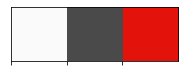

In [4]:
sns.palplot(['#fafafa', '#4a4a4a', '#e3120b'])

In [6]:
sns.color_palette("PuBu", 2)

[(0.7058823529411765, 0.7673202614379085, 0.873202614379085),
 (0.1477124183006536, 0.5228758169934641, 0.7320261437908496)]

### Barplot

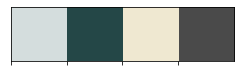

In [7]:
sns.palplot(['#d4dddd', '#244747', '#efe8d1', '#4a4a4a'])

In [9]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
def age_band(num):
    for i in range(1, 100):
        if num < 10*i :  
            return f'{(i-1) * 10} ~ {i*10}'

data['age_band'] = data['Age'].apply(age_band)

In [24]:
titanic_age = data[['age_band', 'Survived']].groupby('age_band')['Survived'].value_counts().sort_index().unstack().fillna(0)
titanic_age['Survival rate'] = titanic_age[1] / (titanic_age[0] + titanic_age[1]) * 100


In [25]:
titanic_age

Survived,0,1,Survival rate
age_band,,,
0 ~ 10,24.0,38.0,61.290323
10 ~ 20,61.0,41.0,40.196078
20 ~ 30,143.0,77.0,35.000000
30 ~ 40,94.0,73.0,43.712575
40 ~ 50,55.0,34.0,38.202247
50 ~ 60,28.0,20.0,41.666667
60 ~ 70,13.0,6.0,31.578947
70 ~ 80,6.0,0.0,0.000000
80 ~ 90,0.0,1.0,100.000000


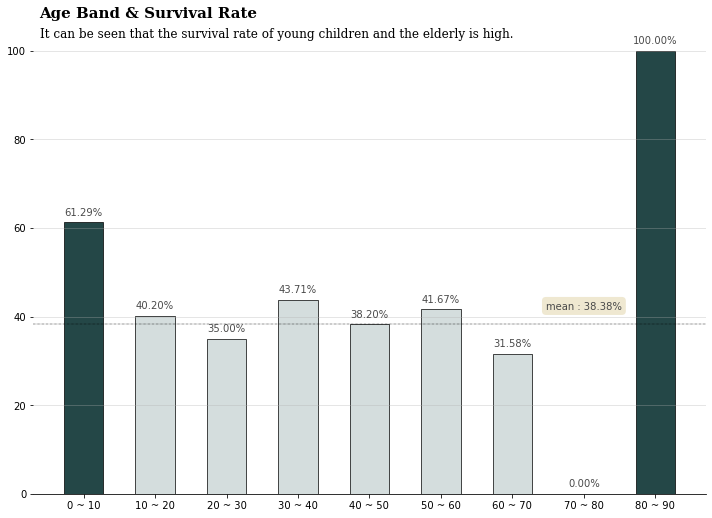

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))

color_map = ['#d4dddd' for _ in range(9)]
color_map[0] = color_map[8] = '#244747' # color highlight

# main actor
ax.bar(titanic_age['Survival rate'].index, titanic_age['Survival rate'], 
       color=color_map, width=0.55, 
       edgecolor='black', 
       linewidth=0.7)

# Annotation Part
for i in titanic_age['Survival rate'].index:
    ax.annotate(f"{titanic_age['Survival rate'][i]:.02f}%", 
                   xy=(i, titanic_age['Survival rate'][i] + 2.3),
                   va = 'center', ha='center',fontweight='light', 
                   color='#4a4a4a')

# mean line + annotation
mean = data['Survived'].mean() *100
ax.axhline(mean ,color='black', linewidth=0.4, linestyle='dashdot')
ax.annotate(f"mean : {mean :.4}%", 
            xy=('70 ~ 80', mean + 4),
            va = 'center', ha='center',
            color='#4a4a4a',
            bbox=dict(boxstyle='round', pad=0.4, facecolor='#efe8d1', linewidth=0))

for s in ["top","right","left"]:
    ax.spines[s].set_visible(False)
    

# Title & Subtitle    
fig.text(0.06, 1, 'Age Band & Survival Rate', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.06, 0.96, 'It can be seen that the survival rate of young children and the elderly is high.', fontsize=12, fontweight='light', fontfamily='serif')

grid_y_ticks = np.arange(0, 101, 20)
ax.set_yticks(grid_y_ticks)
ax.grid(axis='y', linestyle='-', alpha=0.4)


# platform
plt.tight_layout()
plt.show()

### Heatmap

In [48]:
data['Sex'] = data['Sex'].map({'male':0, 'female':1})
data['Embarked'] = data['Embarked'].fillna('S')
data['Embarked'] = data['Embarked'].map({'S':0, 'C':1, 'Q':2})
data['Family'] = data['SibSp'] + data['Parch']
data = data[[col for col in data.columns if col !='Survived'] + ['Survived']]  

corr = data.corr()
corr

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Survived
PassengerId,1.000000,-0.035144,-0.042939,0.036847,-0.057527,-0.001652,0.012658,-0.030467,-0.040143,-0.005007
Pclass,-0.035144,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500,0.045702,0.065997,-0.338481
Sex,-0.042939,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333,0.116569,0.200988,0.543351
Age,0.036847,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067,0.010171,-0.301914,-0.077221
SibSp,-0.057527,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651,-0.059961,0.890712,-0.035322
Parch,-0.001652,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225,-0.078665,0.783111,0.081629
Fare,0.012658,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000,0.062142,0.217138,0.257307
Embarked,-0.030467,0.045702,0.116569,0.010171,-0.059961,-0.078665,0.062142,1.000000,-0.080281,0.106811
Family,-0.040143,0.065997,0.200988,-0.301914,0.890712,0.783111,0.217138,-0.080281,1.000000,0.016639
Survived,-0.005007,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307,0.106811,0.016639,1.000000


In [49]:
sns.color_palette(sns.diverging_palette(230, 20))

[(0.2509335357076959, 0.4944143311197457, 0.6104170295454563),
 (0.5266567751883763, 0.6751928585334119, 0.7467240840661896),
 (0.8050726244296104, 0.8577368012538521, 0.8843622621662269),
 (0.9140860646530862, 0.8246826885128927, 0.8028133239419792),
 (0.8384144678873866, 0.5785740917778832, 0.5129511551488873),
 (0.7634747047461135, 0.3348456555528834, 0.225892295531744)]

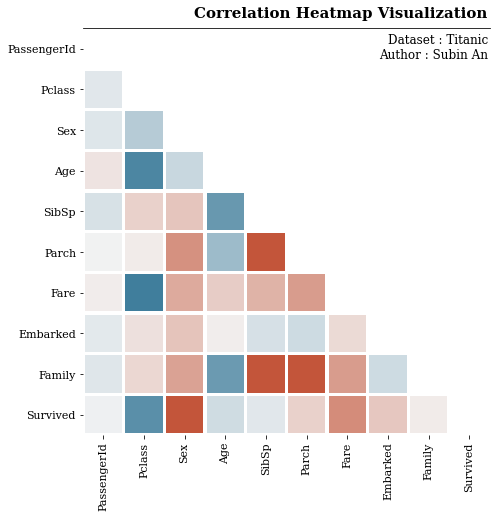

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))

# 只需保留下三角即可
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(230, 20, as_cmap=True) # colormap

# 熱度圖
sns.heatmap(corr, 
            square=True, 
            mask=mask,
            linewidth=2.5, 
            vmax=0.4, vmin=-0.4, 
            cmap=cmap, # color map
            cbar=False, 
            ax=ax)

ax.set_yticklabels(ax.get_xticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

ax.spines['top'].set_visible(True)

fig.text(0.97, 1, 'Correlation Heatmap Visualization', fontweight='bold', fontfamily='serif', fontsize=15, ha='right')    
fig.text(0.97, 0.92, 'Dataset : Titanic\nAuthor : Subin An', fontweight='light', fontfamily='serif', fontsize=12, ha='right')    

plt.tight_layout()
plt.show()